# `xarray`

`xarray` expands the utility of the time series analysis package `pandas` into more than one dimension. It is actively being developed in conjunction with many other packages under the [Pangeo](https://pangeo.io/) umbrella. For example, you can run with Dask to use multiple cores on your laptop when you are working with data read in with `xarray`.

## NetCDF files and other formats

NetCDF is a binary storage format for many different kinds of rectangular data. Examples include atmosphere and ocean model output, satellite images, and timeseries data. NetCDF files are intended to be device independent, and the dataset may be queried in a fast, random-access way. More information about NetCDF files can be found [here](http://www.unidata.ucar.edu/software/netcdf/). The [CF conventions](http://cfconventions.org) are used for storing NetCDF data for earth system models, so that programs can be aware of the coordinate axes used by the data cubes.

We will read in netCDF files using `xarray`; a variety of other file formats will work too.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cmocean.cm as cmo
import pandas as pd

import xarray as xr

## Sea surface temperature example

An example NetCDF file containing monthly means of sea surface temperature over 160 years can be found [here](http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.ersst.v4.html). We'll use the `xarray` package to read this file, which has already been saved into the `data` directory.

One of the useful things about `xarray` is that it doesn't deal with the numbers in the file until it has to. This is called "lazy evaluation". It will note the operations you want done, but won't actually perform them until it needs to spit out numbers.

Viewing metadata is instantaneous since no calculations need to be done, even if the file is huge.

An xarray data object is a "dataset" or "data array".

In [2]:
ds = xr.open_dataset('../data/sst.mnmean.v4.nc')

# look at overview of metadata for file
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 1946)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes:
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    Conventions:             CF-1.2
    institut

In [3]:
# metadata for sst variable
ds['sst']

<xarray.DataArray 'sst' (time: 1946, lat: 89, lon: 180)>
[31174920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [4]:
# look at shape of sst variable
ds.sst.shape, ds.sst.units

((1946, 89, 180), 'degC')

In [5]:
# view any of the metadata
ds.history

"created 10/2014 by CAS using NCDC's ERSST V4 ascii values"

---
### *Exercise*

> Inspect the `xarray` dataset object. 

>  1. What are the units of the time variable?
>  1. What are the dimensions of the latitude variable?

---

## Extract numbers

Note that you can always extract the actual numbers from a called to your dataset using `.values` at the end. Be careful when you use this since it might be a lot of information. Always check the metadata without using `.values` first to see how large the arrays are you'll be reading in.

In [6]:
ds.lat.values

array([ 88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,  68.,
        66.,  64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,  46.,
        44.,  42.,  40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,  24.,
        22.,  20.,  18.,  16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,
         0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16., -18., -20.,
       -22., -24., -26., -28., -30., -32., -34., -36., -38., -40., -42.,
       -44., -46., -48., -50., -52., -54., -56., -58., -60., -62., -64.,
       -66., -68., -70., -72., -74., -76., -78., -80., -82., -84., -86.,
       -88.], dtype=float32)

## Select data

Analogously to how we selected data from `pandas` dataframes using `.loc` and `.iloc`, we extract data from `xarray` datasets using `.sel` and `.isel`. The commands are much longer when using `xarray` because we have multi-dimensional data now.

When files are read in, data arrays are read in as variables and the coordinates that they are in reference to are called "coordinates". For example, in the present dataset, we have the following coordinates:

In [7]:
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

We also have the following data variables, which are the main data of the file:

In [8]:
ds.data_vars

Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...

This means that we should subselect from the data variable "sst" with respect to the coordinates. We can select from none up to all of the coordinates that the sst variable is respect to. As we can see in the following cell, the variable "sst" has coordinates "lat", "lon", and "time".

In [9]:
ds.sst.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

We'll start with a small example: let's choose a single time to plot. Here is how to choose a specific time:

In [10]:
ds.sst.sel(time='1954-6-1')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

Now let's plot it! Note that we are still using `cartopy` to plot our maps and we therefore still need to input the projection information with the "transform" keyword argument.

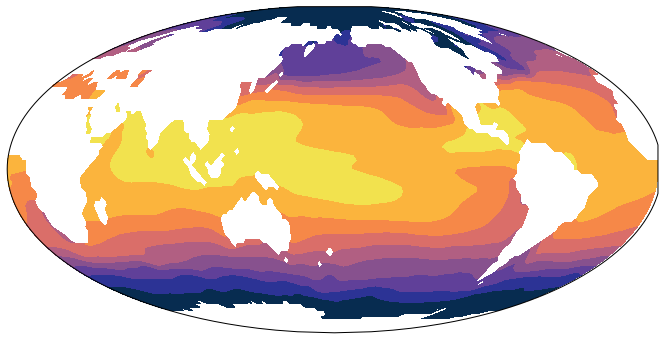

In [11]:
proj = cartopy.crs.Mollweide(central_longitude=180)
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(ds.lon, ds.lat, ds.sst.sel(time='1954-6-1'), 10, cmap=cmo.thermal, transform=pc)

You can also select a "nearest" point in time if you aren't sure exactly when your time slices are:

In [12]:
ds['sst'].sel(time='1954-05-23', method='nearest')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

We can either select by coordinate type, such as in the following cell where we choose all times between (and including) the years 1900 and 1950, longtitudes between 260 and 280 degrees, and latitude between 16 and 30 degrees.

In [13]:
ds.sst.sel(time=slice('1900','1950'), lon=slice(-100+360, -80+360), lat=slice(30,16))

<xarray.DataArray 'sst' (time: 612, lat: 8, lon: 11)>
array([[[  nan,   nan, ...,   nan, 21.79],
        [  nan,   nan, ..., 21.21, 22.67],
        ...,
        [  nan,   nan, ..., 26.91, 26.99],
        [28.1 , 27.83, ..., 27.12, 27.19]],

       [[  nan,   nan, ...,   nan, 21.85],
        [  nan,   nan, ..., 21.3 , 22.83],
        ...,
        [  nan,   nan, ..., 26.79, 26.82],
        [28.12, 28.  , ..., 26.96, 26.94]],

       ...,

       [[  nan,   nan, ...,   nan, 25.05],
        [  nan,   nan, ..., 25.16, 25.76],
        ...,
        [  nan,   nan, ..., 28.24, 28.29],
        [29.09, 28.75, ..., 28.2 , 28.27]],

       [[  nan,   nan, ...,   nan, 23.08],
        [  nan,   nan, ..., 22.84, 23.83],
        ...,
        [  nan,   nan, ..., 27.21, 27.27],
        [28.64, 28.13, ..., 27.31, 27.41]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 30.0 28.0 26.0 24.0 22.0 20.0 18.0 16.0
  * lon      (lon) float32 260.0 262.0 264.0 266.0 ... 274.0 276.0 278.0 280.0
  * time   

.... or by index, such as in the following cell where we select the first index of data in terms of with time, longitude, and latitude:

In [14]:
ds.sst.isel(time=0, lon=0, lat=0)

<xarray.DataArray 'sst' ()>
array(-1.8)
Coordinates:
    lat      float32 88.0
    lon      float32 0.0
    time     datetime64[ns] 1854-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

## Loading remote data

### THREDDS example. Loading data from a remote dataset.

The netCDF library can be compiled such that it is 'THREDDS enabled', which means that you can put in a URL instead of a filename. This allows access to large remote datasets, without having to download the entire file. You can find a large list of datasets served via an OpenDAP/THREDDs server [here](http://apdrc.soest.hawaii.edu/data/data.php).

Let's look at the ESRL/NOAA 20th Century Reanalysis – Version 2. You can access the data by the following link (this is the link of the `.dds` and `.das` files without the extension.):

In [15]:
loc = 'http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/NOAA_20th_Century/V2c/daily/monolevel/cprat'
ds2 = xr.open_dataset(loc)
ds2

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 59900)
Coordinates:
  * time     (time) datetime64[ns] 1851-01-01 1851-01-02 ... 2014-12-31
  * lat      (lat) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Data variables:
    cprat    (time, lat, lon) float32 ...
Attributes:
    title:          Daily NOAA-CIRES 20th Century Reanalysis V2c
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/esrl_daily_monoleve...
    history:        Tue Oct 29 17:22:26 HST 2019 : imported by GrADS Data Ser...

In [16]:
ds2['cprat'].long_name

'daily convective precipitation rate (kg/m^2/s) '

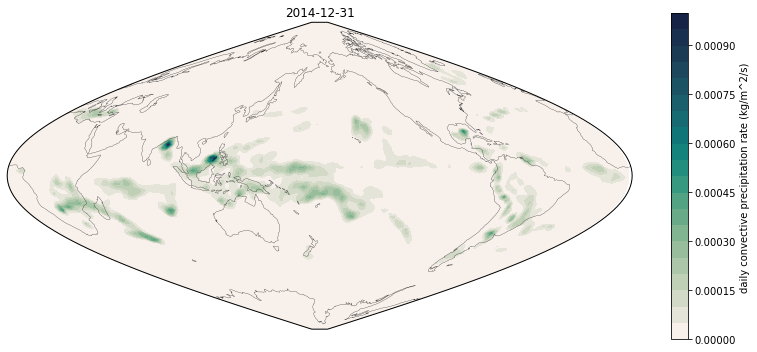

In [17]:
proj = cartopy.crs.Sinusoidal(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.25)
# use the last time available
mappable = ax.contourf(ds2.lon, ds2.lat, ds2.cprat.isel(time=-1), 20, cmap=cmo.tempo, transform=pc)
ax.set_title(pd.Timestamp(ds2.time[-1].values).isoformat()[:10])  # or use .strftime instead of .isoformat
fig.colorbar(mappable).set_label('%s' % ds2['cprat'].long_name)

---
### *Exercise*

> Pick another [variable](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel) from this dataset. Inspect and plot the variable in a similar manner to precipitation.

> Find another dataset on a THREDDS server at SOEST (or elsewhere), pick a variable, and plot it.

---

Note that you can also just plot against the included coordinates with built-in convenience functions (this is analogous to `pandas` which was for one dimension). The sst is being plotted against longitude and latitude, which is flattening it out.

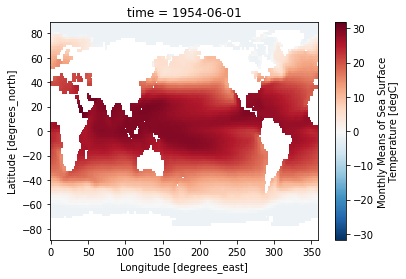

In [25]:
ds.sst.sel(time='1954-6-1').plot()#transform=pc)  # the plot's projection

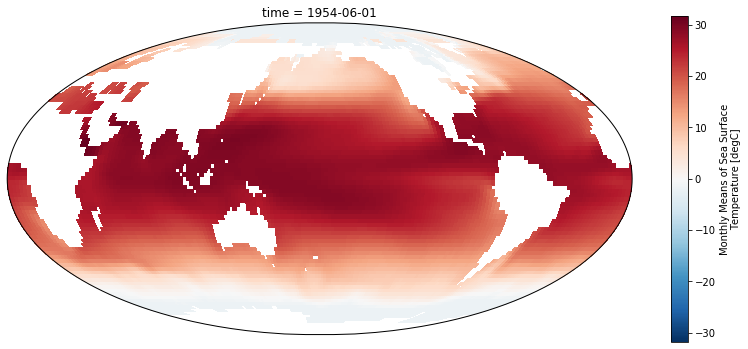

In [27]:
proj = cartopy.crs.Mollweide(central_longitude=180)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ds.sst.sel(time='1954-6-1').plot(transform=pc)  # the plot's projection

## GroupBy

Like in `pandas`, we can use the `groupby` method to do some neat things. Let's group by season and save a new file.

In [29]:
seasonal_mean = ds.groupby('time.season').mean('time')
seasonal_mean

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, season: 4)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (season, nbnds) float64 4.937e+04 4.94e+04 ... 4.94e+04 4.943e+04
    sst        (season, lat, lon) float32 -1.7999921 -1.7999921 ... nan nan

## Saving NetCDF files

Creating netCDF files is tedious if doing it from scratch, but it is very easy when starting from data that has been read in using `xarray`.

In [30]:
fname = 'test.nc'
seasonal_mean.to_netcdf(fname)

In [31]:
xr.open_dataset(fname)

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, season: 4)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (season, nbnds) float64 ...
    sst        (season, lat, lon) float32 ...

---
### *Exercise*

> Plot the difference between summer and winter mean sea surface temperature.

---